In [533]:
import pandas as pd

In [534]:
import numpy as np
vaccine=pd.read_csv("C:/Users/leena/Downloads/training_set_features.csv")
vaccine.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer
feature_cols=vaccine.columns
def encode_missing_columns(df, col):
    le = LabelEncoder()
    
    # gets unique values w/o NaN
    unique_without_nan = pd.Series([i for i in df[col].unique() if type(i) == str])
    le.fit(unique_without_nan) # Fit on unique values
    
    # Set transformed col leaving np.NaN as they are
    df[col] = df[col].apply(lambda x: le.transform([x])[0] if type(x) == str else x)

cat_cols=['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa','employment_industry','employment_occupation']
df_knn_imputer = vaccine.copy()
for col in cat_cols:
    encode_missing_columns(vaccine, col)
knn_imputer = KNNImputer(n_neighbors=5)

vaccine[feature_cols] = knn_imputer.fit_transform(vaccine[feature_cols])
sns.heatmap(vaccine.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=vaccine.columns);

In [535]:
vaccine.dtypes

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [536]:
vaccine.isna().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [537]:
vaccine['race'].value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [538]:
obj_df.isnull().sum()

Series([], dtype: float64)

In [539]:
column_with_nulls=['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa','employment_industry','employment_occupation']
missing_percentage = vaccine[column_with_nulls].isnull().mean() * 100
missing_percentage

age_group                 0.000000
education                 5.268282
race                      0.000000
sex                       0.000000
income_poverty           16.561201
marital_status            5.272026
rent_or_own               7.645936
employment_status         5.477965
hhs_geo_region            0.000000
census_msa                0.000000
employment_industry      49.912008
employment_occupation    50.436215
dtype: float64

In [540]:
import seaborn as sns

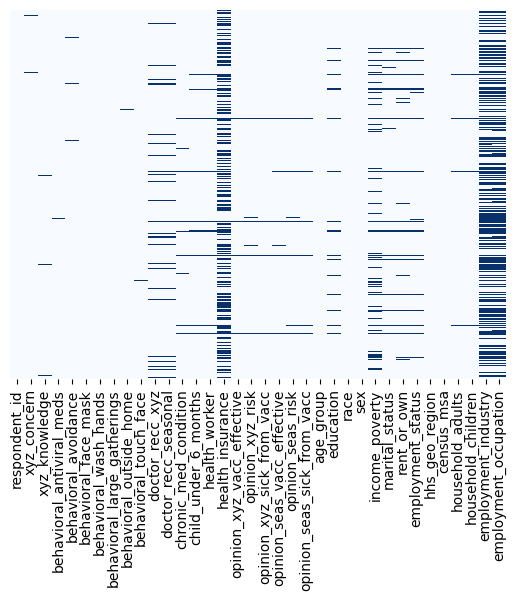

In [541]:
sns.heatmap(vaccine.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=vaccine.columns);

In [542]:
vaccine['age_group'].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

In [543]:
mapping_dictionary_value={'18 - 34 Years':1,'35 - 44 Years':2,'45 - 54 Years':3,'55 - 64 Years':4,'65+ Years':5}
vaccine['age_group']=vaccine.age_group.map(mapping_dictionary_value)
vaccine['age_group'].value_counts()

5    6843
4    5563
3    5238
1    5215
2    3848
Name: age_group, dtype: int64

In [544]:
vaccine["education"].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64

In [545]:
mapping_dictionary_value={'< 12 Years':1,'12 Years':2,'Some College':3,'College Graduate':4}
vaccine['education']=vaccine.education.map(mapping_dictionary_value)
vaccine['education'].value_counts()

4.0    10097
3.0     7043
2.0     5797
1.0     2363
Name: education, dtype: int64

In [546]:
vaccine['race'].unique()

array(['White', 'Black', 'Other or Multiple', 'Hispanic'], dtype=object)

In [547]:
Sex_converted_variable=pd.get_dummies(vaccine['sex'],drop_first=True).head()
Sex_converted_variable

,Male
0,0
1,1
2,1
3,0
4,0


In [548]:
vaccine=pd.concat([vaccine,Sex_converted_variable],axis=1)
vaccine.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,Male
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,1.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0.0


In [549]:
list_top=vaccine.race.value_counts().sort_values(ascending=False).head(10).index
list_top

Index(['White', 'Black', 'Hispanic', 'Other or Multiple'], dtype='object')

In [550]:
for category in list_top:
    vaccine[category]=np.where(vaccine['race']==category,1,0)
vaccine.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,census_msa,household_adults,household_children,employment_industry,employment_occupation,Male,White,Black,Hispanic,Other or Multiple
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Non-MSA,0.0,0.0,NaN,NaN,0.0,1,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1.0,1,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,1.0,1,0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,"MSA, Principle City",0.0,0.0,NaN,NaN,0.0,1,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0.0,1,0,0,0


In [551]:
vaccine['income_poverty'].value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

In [552]:
mapping_dictionary_value={'Below Poverty':1,'<= $75,000, Above Poverty':2,'> $75,000':3}
vaccine['income_poverty']=vaccine.income_poverty.map(mapping_dictionary_value)
vaccine['income_poverty'].value_counts()

2.0    12777
3.0     6810
1.0     2697
Name: income_poverty, dtype: int64

In [553]:
vaccine['marital_status'].value_counts()

Married        13555
Not Married    11744
Name: marital_status, dtype: int64

In [554]:
list_top=vaccine.marital_status.value_counts().sort_values(ascending=False).head(10).index
list_top

Index(['Married', 'Not Married'], dtype='object')

In [555]:
for category in list_top:
    vaccine[category]=np.where(vaccine['marital_status']==category,1,0)
vaccine.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,household_children,employment_industry,employment_occupation,Male,White,Black,Hispanic,Other or Multiple,Married,Not Married
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,NaN,NaN,0.0,1,0,0,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,pxcmvdjn,xgwztkwe,1.0,1,0,0,0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,rucpziij,xtkaffoo,1.0,1,0,0,0,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,NaN,NaN,0.0,1,0,0,0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,wxleyezf,emcorrxb,0.0,1,0,0,0,1,0


In [556]:
vaccine['rent_or_own'].value_counts()

Own     18736
Rent     5929
Name: rent_or_own, dtype: int64

In [557]:
list_top=vaccine.rent_or_own.value_counts().sort_values(ascending=False).head(10).index
list_top

Index(['Own', 'Rent'], dtype='object')

In [558]:
for category in list_top:
    vaccine[category]=np.where(vaccine['rent_or_own']==category,1,0)
vaccine.head()
    

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation,Male,White,Black,Hispanic,Other or Multiple,Married,Not Married,Own,Rent
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,0.0,1,0,0,0,0,1,1,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,xgwztkwe,1.0,1,0,0,0,0,1,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,xtkaffoo,1.0,1,0,0,0,0,1,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,NaN,0.0,1,0,0,0,0,1,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,emcorrxb,0.0,1,0,0,0,1,0,1,0


In [559]:
vaccine['employment_status'].value_counts()

Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64

In [560]:
list_top=vaccine.employment_status.value_counts().sort_values().index
list_top

Index(['Unemployed', 'Not in Labor Force', 'Employed'], dtype='object')

In [561]:
for categories in list_top:
    vaccine[categories]=np.where(vaccine['employment_status']==categories,1,0)
vaccine.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,Black,Hispanic,Other or Multiple,Married,Not Married,Own,Rent,Unemployed,Not in Labor Force,Employed
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,1,0,0,1,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,1,0,1,0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,1,0,1,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,1,0,1,0,0,0,1


In [562]:
vaccine['hhs_geo_region'].value_counts()

lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: hhs_geo_region, dtype: int64

In [563]:
list_top=vaccine.hhs_geo_region.value_counts().sort_values().index
list_top

Index(['dqpwygqj', 'atmpeygn', 'lrircsnp', 'mlyzmhmf', 'bhuqouqj', 'kbazzjca',
       'oxchjgsf', 'qufhixun', 'fpwskwrf', 'lzgpxyit'],
      dtype='object')

In [564]:
for categories in list_top:
    vaccine[categories]=np.where(vaccine['employment_status']==categories,1,0)
vaccine.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,dqpwygqj,atmpeygn,lrircsnp,mlyzmhmf,bhuqouqj,kbazzjca,oxchjgsf,qufhixun,fpwskwrf,lzgpxyit
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [565]:
vaccine['census_msa'].value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

In [566]:
list_top=vaccine.census_msa.value_counts().sort_values().index
list_top

Index(['Non-MSA', 'MSA, Principle City', 'MSA, Not Principle  City'], dtype='object')

In [567]:
for categories in list_top:
    vaccine[categories]=np.where(vaccine['census_msa']==categories,1,0)
vaccine.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,mlyzmhmf,bhuqouqj,kbazzjca,oxchjgsf,qufhixun,fpwskwrf,lzgpxyit,Non-MSA,"MSA, Principle City","MSA, Not Principle City"
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [568]:
vaccine['employment_industry'].value_counts()

fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: employment_industry, dtype: int64

In [569]:
list_top=vaccine.employment_industry.value_counts().sort_values().index
list_top
for categories in list_top:
    vaccine[categories]=np.where(vaccine['employment_industry']==categories,1,0)
vaccine.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rucpziij,vjjrobsf,mfikgejo,xicduogh,arjwrbjb,atmlpfrs,pxcmvdjn,ldnlellj,wxleyezf,fcxhlnwr
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [570]:
vaccine['employment_occupation'].value_counts()

xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: employment_occupation, dtype: int64

In [571]:
list_top=vaccine.employment_occupation.value_counts().sort_values().index
list_top
for categories in list_top:
    vaccine[categories]=np.where(vaccine['employment_occupation']==categories,1,0)
vaccine.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,uqqtjvyb,kldqjyjy,xqwwgdyp,qxajmpny,hfxkjkmi,xgwztkwe,cmhcxjea,emcorrxb,mxkfnird,xtkaffoo
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0


In [572]:
del vaccine['race']

In [573]:
del vaccine['marital_status']

In [574]:
del vaccine['rent_or_own']

In [575]:
del vaccine['employment_status']

In [576]:
del vaccine['census_msa']

In [577]:
del vaccine['employment_industry']

In [578]:
del vaccine['employment_occupation']

In [579]:
del vaccine['sex']

In [580]:
del vaccine['hhs_geo_region']

In [581]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer
feature_cols=vaccine.columns
def encode_missing_columns(df, col):
    le = LabelEncoder()
    
    # gets unique values w/o NaN
    unique_without_nan = pd.Series([i for i in df[col].unique() if type(i) == str])
    le.fit(unique_without_nan) # Fit on unique values
    
    # Set transformed col leaving np.NaN as they are
    df[col] = df[col].apply(lambda x: le.transform([x])[0] if type(x) == str else x)

C:\Users\leena\AppData\Local\Temp\ipykernel_852\3263958951.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  unique_without_nan = pd.Series([i for i in df[col].unique() if type(i) == str])
C:\Users\leena\AppData\Local\Temp\ipykernel_852\3263958951.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  unique_without_nan = pd.Series([i for i in df[col].unique() if type(i) == str])
C:\Users\leena\AppData\Local\Temp\ipykernel_852\3263958951.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  unique_without_nan = pd.Series([i for i in df[col].unique() if type(i) == str])
C:\Users\leena\AppData\Local\Temp\ipykernel_852\3263958951.py:15: FutureW

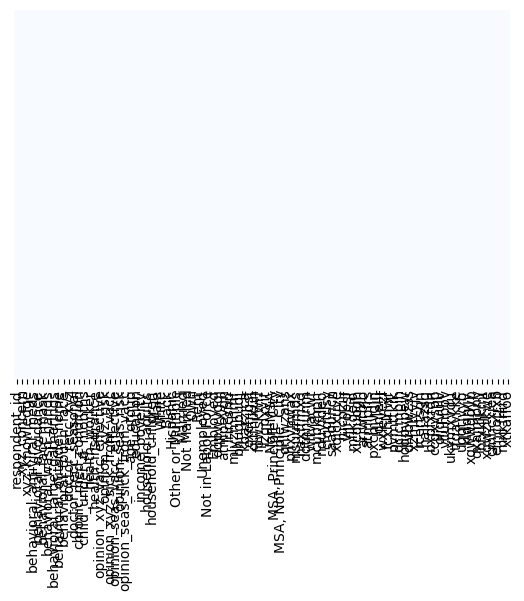

In [582]:
cat_cols=vaccine.columns
df_knn_imputer = vaccine.copy()
for col in cat_cols:
    encode_missing_columns(vaccine, col)
knn_imputer = KNNImputer(n_neighbors=5)

vaccine[feature_cols] = knn_imputer.fit_transform(vaccine[feature_cols])
sns.heatmap(vaccine.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=vaccine.columns);

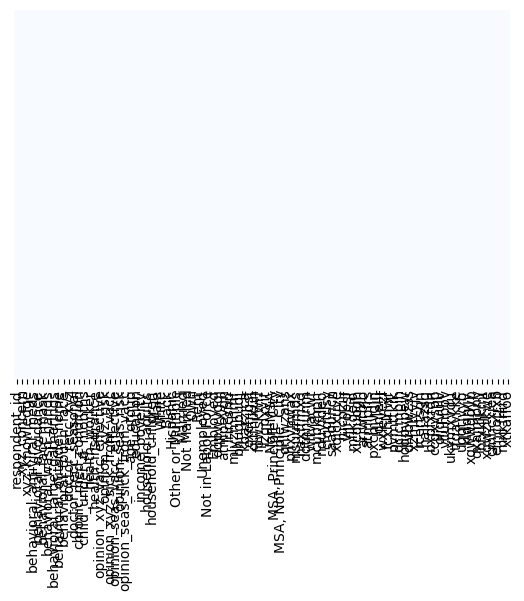

In [583]:
sns.heatmap(vaccine.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=vaccine.columns);

In [584]:
vaccine.isnull().sum().head(60)

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
income_poverty                 0
household_adults               0
household_children             0
Male                           0
White                          0
Black                          0
Hispanic  

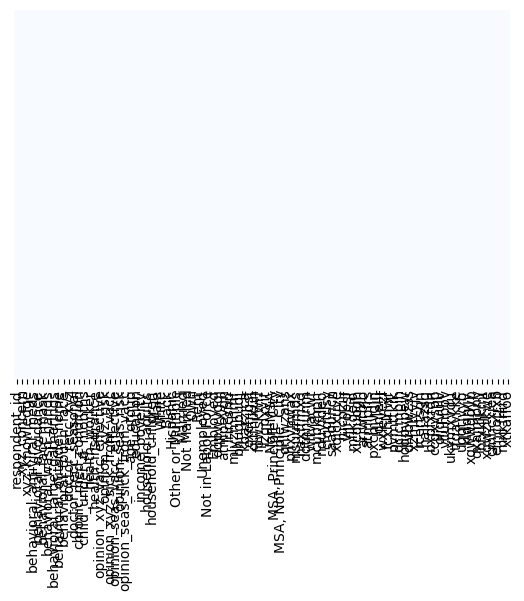

In [585]:
import pandas as pd

import numpy as np
vaccine1=pd.read_csv("C:/Users/leena/Downloads/test_set_features.csv")
vaccine1.head()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer
feature_cols=vaccine1.columns

sns.heatmap(vaccine1.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=vaccine1.columns);

vaccine1.dtypes

vaccine1.isna().sum()

vaccine1['race'].value_counts()

obj_df.isnull().sum()

column_with_nulls=['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa','employment_industry','employment_occupation']
missing_percentage = vaccine1[column_with_nulls].isnull().mean() * 100
missing_percentage

import seaborn as sns

sns.heatmap(vaccine1.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=vaccine1.columns);

vaccine1['age_group'].value_counts()

mapping_dictionary_value={'18 - 34 Years':1,'35 - 44 Years':2,'45 - 54 Years':3,'55 - 64 Years':4,'65+ Years':5}
vaccine1['age_group']=vaccine1.age_group.map(mapping_dictionary_value)
vaccine1['age_group'].value_counts()

vaccine1["education"].value_counts()

mapping_dictionary_value={'< 12 Years':1,'12 Years':2,'Some College':3,'College Graduate':4}
vaccine1['education']=vaccine1.education.map(mapping_dictionary_value)
vaccine1['education'].value_counts()

vaccine1['race'].unique()

Sex_converted_variable=pd.get_dummies(vaccine1['sex'],drop_first=True).head()
Sex_converted_variable

vaccine1=pd.concat([vaccine1,Sex_converted_variable],axis=1)
vaccine1.head()

list_top=vaccine1.race.value_counts().sort_values(ascending=False).head(10).index
list_top

for category in list_top:
    vaccine1[category]=np.where(vaccine1['race']==category,1,0)
vaccine1.head()

vaccine1['income_poverty'].value_counts()

mapping_dictionary_value={'Below Poverty':1,'<= $75,000, Above Poverty':2,'> $75,000':3}
vaccine1['income_poverty']=vaccine1.income_poverty.map(mapping_dictionary_value)
vaccine1['income_poverty'].value_counts()

vaccine1['marital_status'].value_counts()

list_top=vaccine1.marital_status.value_counts().sort_values(ascending=False).head(10).index
list_top

for category in list_top:
    vaccine1[category]=np.where(vaccine1['marital_status']==category,1,0)
vaccine1.head()

vaccine1['rent_or_own'].value_counts()

list_top=vaccine1.rent_or_own.value_counts().sort_values(ascending=False).head(10).index
list_top

for category in list_top:
    vaccine1[category]=np.where(vaccine1['rent_or_own']==category,1,0)
vaccine1.head()
    

vaccine1['employment_status'].value_counts()

list_top=vaccine1.employment_status.value_counts().sort_values().index
list_top

for categories in list_top:
    vaccine1[categories]=np.where(vaccine1['employment_status']==categories,1,0)
vaccine1.head()

vaccine1['hhs_geo_region'].value_counts()

list_top=vaccine1.hhs_geo_region.value_counts().sort_values().index
list_top

for categories in list_top:
    vaccine1[categories]=np.where(vaccine1['employment_status']==categories,1,0)
vaccine1.head()

vaccine1['census_msa'].value_counts()

list_top=vaccine1.census_msa.value_counts().sort_values().index
list_top

for categories in list_top:
    vaccine1[categories]=np.where(vaccine1['census_msa']==categories,1,0)
vaccine1.head()

vaccine1['employment_industry'].value_counts()

list_top=vaccine1.employment_industry.value_counts().sort_values().index
list_top
for categories in list_top:
    vaccine1[categories]=np.where(vaccine1['employment_industry']==categories,1,0)
vaccine1.head()

vaccine1['employment_occupation'].value_counts()

list_top=vaccine1.employment_occupation.value_counts().sort_values().index
list_top
for categories in list_top:
    vaccine1[categories]=np.where(vaccine1['employment_occupation']==categories,1,0)
vaccine1.head()

del vaccine1['race']

del vaccine1['marital_status']

del vaccine1['rent_or_own']

del vaccine1['employment_status']

del vaccine1['census_msa']

del vaccine1['employment_industry']

del vaccine1['employment_occupation']

del vaccine1['sex']

del vaccine1['hhs_geo_region']

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer
vaccine1.columns = vaccine1.columns.astype(str)
feature_cols=vaccine1.columns


cat_cols=vaccine1.columns
df_knn_imputer = vaccine1.copy()

knn_imputer = KNNImputer(n_neighbors=5)

vaccine1[feature_cols] = knn_imputer.fit_transform(vaccine1[feature_cols])
sns.heatmap(vaccine.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=vaccine.columns);

In [594]:
vaccine.columns==vaccine1.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True])

In [595]:
vaccine.columns


Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'income_poverty', 'household_adults', 'household_children',
       'Male', 'White', 'Black', 'Hispanic', 'Other or Multiple', 'Married',
       'Not Married', 'Own', 'Rent', 'Unemployed', 'Not in Labor Force',
       'Employed', 'dqpwygqj', 'atmpeygn', 'lrircsnp', 'mlyzmhmf', 'bhuqouqj',
       'kbazzjca', 'oxchjgsf', 'qufhixun', 'fpwskwrf', 'lzgpxyit', 'Non-MSA',
       'MSA

In [598]:
vaccine1.columns
new_order = ['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'income_poverty', 'household_adults', 'household_children',
       'Male', 'White', 'Black', 'Hispanic', 'Other or Multiple', 'Married',
       'Not Married', 'Own', 'Rent', 'Unemployed', 'Not in Labor Force',
       'Employed', 'dqpwygqj', 'atmpeygn', 'lrircsnp', 'mlyzmhmf', 'bhuqouqj',
       'kbazzjca', 'oxchjgsf', 'qufhixun', 'fpwskwrf', 'lzgpxyit', 'Non-MSA',
       'MSA, Principle City', 'MSA, Not Principle  City', 'qnlwzans',
       'phxvnwax', 'msuufmds', 'haxffmxo', 'dotnnunm', 'wlfvacwt', 'mcubkhph',
       'nduyfdeo', 'cfqqtusy', 'saaquncn', 'xqicxuve', 'rucpziij', 'vjjrobsf',
       'mfikgejo', 'xicduogh', 'arjwrbjb', 'atmlpfrs', 'pxcmvdjn', 'ldnlellj',
       'wxleyezf', 'fcxhlnwr', 'pvmttkik', 'dcjcmpih', 'hodpvpew', 'dlvbwzss',
       'xzmlyyjv', 'rcertsgn', 'haliazsg', 'bxpfxfdn', 'ccgxvspp', 'oijqvulv',
       'vlluhbov', 'ukymxvdu', 'tfqavkke', 'uqqtjvyb', 'kldqjyjy', 'xqwwgdyp',
       'qxajmpny', 'hfxkjkmi', 'xgwztkwe', 'cmhcxjea', 'emcorrxb', 'mxkfnird',
       'xtkaffoo']
vaccine1=vaccine1[new_order]
vaccine1.columns==vaccine.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [602]:
y_train=pd.read_csv("C:/Users/leena/Downloads/training_set_labels.csv")
y_train=y_train['xyz_vaccine']
y_train

0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: xyz_vaccine, Length: 26707, dtype: int64

In [691]:
x_train=vaccine.copy()
x_train.columns = x_train.columns.astype(str)
y_train=pd.read_csv("C:/Users/leena/Downloads/training_set_labels.csv")
y_train=y_train['xyz_vaccine']
x_test=vaccine1.copy()
x_test.columns = x_test.columns.astype(str)
y_test=pd.read_csv("C:/Users/leena/Downloads/submission_format.csv")
y_test=y_test['h1n1_vaccine']
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create and train logistic regression model with increased max_iter
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(x_train_scaled, y_train)
predictions1= model.predict_proba(x_test_scaled)

In [692]:
prediction1=predictions1[:,1]
prediction1

array([0.08376697, 0.01432086, 0.29804699, ..., 0.14381398, 0.05585521,
       0.50974014])

In [693]:
x_train=vaccine.copy()
x_train.columns = x_train.columns.astype(str)
y_train=pd.read_csv("C:/Users/leena/Downloads/training_set_labels.csv")
y_train=y_train['seasonal_vaccine']
x_test=vaccine1.copy()
x_test.columns = x_test.columns.astype(str)
y_test=pd.read_csv("C:/Users/leena/Downloads/submission_format.csv")
y_test=y_test['seasonal_vaccine']
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create and train logistic regression model with increased max_iter
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(x_train_scaled, y_train)
predictions2= model.predict_proba(x_test_scaled)

In [694]:
predictions2=predictions2[:,1]

In [695]:
prediction1

array([0.08376697, 0.01432086, 0.29804699, ..., 0.14381398, 0.05585521,
       0.50974014])

In [696]:
predictions2

array([0.07617407, 0.27494782, 0.95027478, ..., 0.19292168, 0.40378462,
       0.45511529])

from sklearn.svm import SVC
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
model = SVC(max_iter=5000, solver='lbfgs')
model.fit(x_train_scaled, y_train)
predictions1= model.predict_proba(x_test_scaled)

In [697]:
from sklearn.naive_bayes import GaussianNB
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create and train Gaussian Naive Bayes model
model = GaussianNB()
model.fit(x_train_scaled, y_train)
y_prob = model.predict_proba(x_test_scaled)

In [698]:
y_prob

array([[1.00000000e+000, 1.13204603e-106],
       [1.00000000e+000, 2.97214452e-243],
       [1.00000000e+000, 3.19788886e-291],
       ...,
       [3.61904644e-001, 6.38095356e-001],
       [1.10260689e-003, 9.98897393e-001],
       [4.61458391e-003, 9.95385416e-001]])

In [699]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
logreg_model = LogisticRegression(max_iter=1000, solver='lbfgs')
gaussian_nb_model = GaussianNB()

# Compare models using cross-validation
cv_scores_logreg = cross_val_score(logreg_model, x_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores_gaussian_nb = cross_val_score(gaussian_nb_model, x_train_scaled, y_train, cv=5, scoring='accuracy')


In [700]:
cv_scores_logreg

array([0.77499064, 0.77892175, 0.77813144, 0.78168882, 0.7755102 ])

In [701]:
cv_scores_gaussian_nb

array([0.64638712, 0.65106702, 0.65137615, 0.63901891, 0.6571803 ])

In [661]:
respondent_id=vaccine1['respondent_id'].values

prediction1.size
predictions2.size
respondent_id.size

26708

In [663]:

df = pd.DataFrame({
    'respondent_id': respondent_id,
    'h1n1_vaccine': prediction1,
    'seasonal_vaccine': predictions2
})

# File path to write CSV
csv_file = 'C:/Users/leena/OneDrive/Documents/predictions.csv'

# Writing to CSV file
df.to_csv(csv_file, index=False)

In [664]:
df

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707.0,0.083767,0.076174
1,26708.0,0.014321,0.274948
2,26709.0,0.298047,0.950275
3,26710.0,0.559421,0.568979
4,26711.0,0.237046,0.163817
...,...,...,...
26703,53410.0,0.334989,0.430823
26704,53411.0,0.043787,0.245256
26705,53412.0,0.143814,0.192922
26706,53413.0,0.055855,0.403785
